# Naive Bayes Algorithm


In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [105]:
dataset = pd.read_csv(r'C:\Users\Muhammad Uzair\Downloads\Datasets\placement.csv')
dataset.head()

,Unnamed: 0,cgpa,score,placement
0,0,6.8,123,1
1,1,5.9,106,0
2,2,5.3,121,0
3,3,7.4,132,1
4,4,5.8,142,0


In [106]:
dataset.drop(['Unnamed: 0'], axis=1, inplace=True)

In [107]:
#data is aproximately normally distributed
dataset.head(3)

,cgpa,score,placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,0


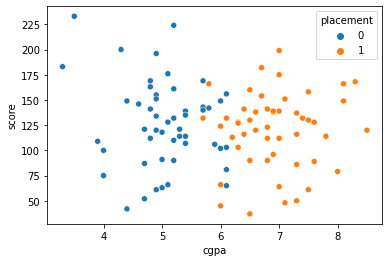

In [108]:
sns.scatterplot(x='cgpa', y='score',hue='placement', data=dataset)
plt.show()

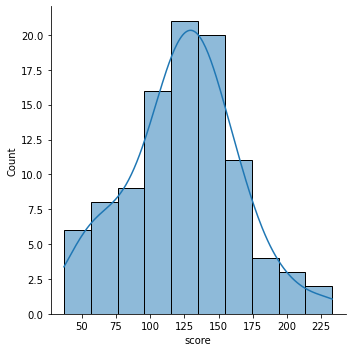

In [109]:
sns.displot(dataset['score'], kde=True)
plt.show()

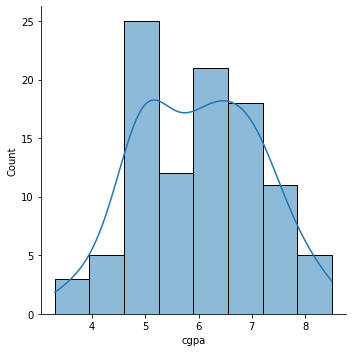

In [110]:
sns.displot(dataset['cgpa'], kde=True)
plt.show()

In [111]:
x= dataset[['cgpa', 'score']]
y= dataset['placement']

In [112]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)   


## 1. Gaussian Naive Bayes
- Used for continuous (numeric) features.
- Assumes features follow a normal (Gaussian) distribution.

In [113]:
from sklearn.naive_bayes import GaussianNB
GB_model = GaussianNB()
GB_model.fit(x_train, y_train)

GaussianNB()

In [114]:
print("Train Score:", GB_model.score(x_train, y_train) * 100)
print(f"Test Score: {GB_model.score(x_test, y_test) * 100:.2f}")

Train Score: 91.25
Test Score: 85.00


In [115]:
GB_model.predict([[6.8,123]])

c:\Users\Muhammad Uzair\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

c:\Users\Muhammad Uzair\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


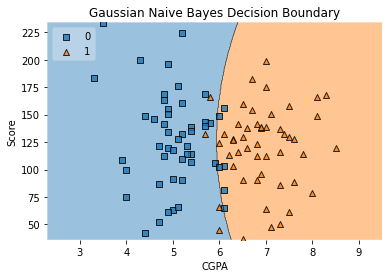

In [116]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=GB_model, legend=2)
plt.xlabel('CGPA')
plt.ylabel('Score')
plt.title('Gaussian Naive Bayes Decision Boundary')
plt.show()

## 2. Bernoulli Naive Bayes
- Used for binary (0/1) features.
- Suitable for data where features are either present or absent.

In [117]:
dataset.head(3)

,cgpa,score,placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,0


In [118]:
from sklearn.naive_bayes import BernoulliNB
BN_model = BernoulliNB()
BN_model.fit(x_train, y_train)

BernoulliNB()

In [119]:
print("Train Score:", BN_model.score(x_train, y_train) * 100)
print(f"Test Score: {BN_model.score(x_test, y_test) * 100:.2f}")

Train Score: 50.0
Test Score: 50.00


In [120]:
#this work on binary data so score is not good
#but we can use it for binary features
#for example if we have binary features like pass/fail, yes/no, etc.
BN_model.predict([[6.8,123]])

c:\Users\Muhammad Uzair\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

c:\Users\Muhammad Uzair\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(
c:\Users\Muhammad Uzair\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:315: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


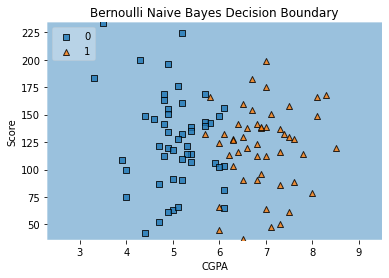

In [121]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=BN_model, legend=2)
plt.xlabel('CGPA')
plt.ylabel('Score')
plt.title('Bernoulli Naive Bayes Decision Boundary')
plt.show()

## 3. Multinomial Naive Bayes
- Used for discrete count data (e.g., word counts in text classification).
- Suitable for categorical features after encoding.

In [122]:
dataset.head(3)

,cgpa,score,placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,0


In [123]:
x = dataset.iloc[:,:-1]
y = dataset['placement']

In [124]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)   

In [125]:
from sklearn.naive_bayes import MultinomialNB
MN_model = MultinomialNB()
MN_model.fit(x_train, y_train)

MultinomialNB()

In [126]:
print("Train Score:", MN_model.score(x_train, y_train) * 100)
print(f"Test Score: {MN_model.score(x_test, y_test) * 100:.2f}")

Train Score: 70.0
Test Score: 95.00


In [127]:
MN_model.predict([[6.8,123]])

c:\Users\Muhammad Uzair\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [128]:

MN_model.predict([[5.3,121]])

c:\Users\Muhammad Uzair\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

c:\Users\Muhammad Uzair\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


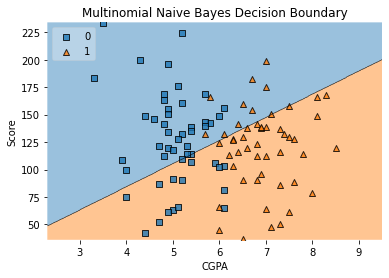

In [129]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=MN_model, legend=2)
plt.xlabel('CGPA')
plt.ylabel('Score')
plt.title('Multinomial Naive Bayes Decision Boundary')
plt.show()